# 차원 축소


## 1.환경준비

### (1) 라이브러리 로딩

In [1]:
!pip install plotly
import plotly.graph_objects as go

In [2]:
# 기본 라이브러리 가져오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *

from sklearn.datasets import load_breast_cancer, load_digits, load_iris, make_swiss_roll
from sklearn.preprocessing import MinMaxScaler

from sklearn.decomposition import PCA

### (2) 샘플 데이터 생성하기


In [3]:
# 럭비공 형태의 샘플 데이터 생성 함수
def generate_rugby_data(n_points=1000, a=1, b=1.5, c=2):
    phi = np.random.uniform(0, np.pi, n_points)
    theta = np.random.uniform(0, 2*np.pi, n_points)
    x = a * np.sin(phi) * np.cos(theta)
    y = b * np.sin(phi) * np.sin(theta)
    z = c * np.cos(phi)
    X = np.column_stack((x, y, z))
    return X

rugby = generate_rugby_data()

# 스위스롤 데이터
swiss_roll, _ = make_swiss_roll(n_samples=1000, noise=0.2)

In [4]:
# 3차원 스캐터 함수 생성
def my_3d_Scatter(X) :
    fig = go.Figure()
    fig.add_trace(go.Scatter3d(x=X[:, 0], y=X[:, 1], z=X[:, 2],
                           mode='markers', marker=dict(size=2, color='blue'),
                           name='Original Data'))

    fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),
                      scene=dict(xaxis_title='X Axis', yaxis_title='Y Axis', zaxis_title='Z Axis'))

    fig.show()

## 2.PCA 개념이해

### (1) 럭비공 형태의 데이터 차원 축소

* 원본 데이터 둘러보기

In [5]:
my_3d_Scatter(rugby)

* 차원 축소

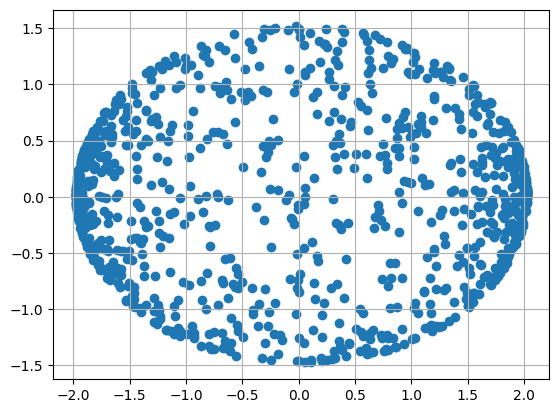

In [6]:
# PCA를 이용하여 2개의 주성분으로 차원 축소
pca = PCA(n_components=2)
X_pca = pca.fit_transform(rugby)

# PCA 축소 데이터 조회
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.grid()
plt.show()


### (2) 스위스롤 형태의 데이터 차원 축소

* 원본 데이터 둘러보기

In [7]:
my_3d_Scatter(swiss_roll)

* 차원 축소

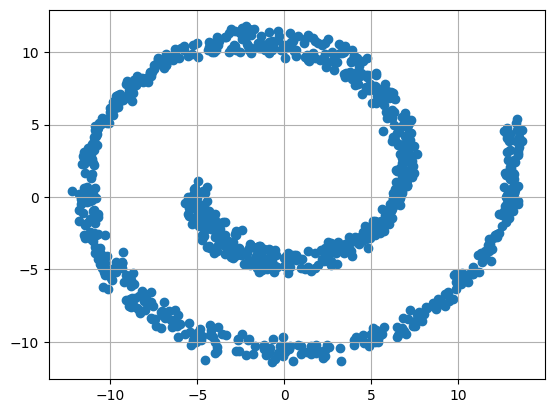

In [8]:
# PCA를 이용하여 2개의 주성분으로 차원 축소
pca = PCA(n_components=2)
X_pca = pca.fit_transform(swiss_roll)

# PCA 축소 데이터 조회
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.grid()
plt.show()


## 3.PCA 사용해보기

### (1) 데이터 준비

* 데이터 로딩

In [9]:
iris = pd.read_csv("https://raw.githubusercontent.com/DA4BAM/dataset/master/iris.csv")
target = 'Species'
x = iris.drop(target, axis = 1)
y = iris.loc[:, target]

In [10]:
x.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


* 스케일링

In [11]:
scaler = MinMaxScaler()
x2 = scaler.fit_transform(x)

# (옵션)데이터프레임 변환
x2 = pd.DataFrame(x2, columns= x.columns)

### (2) 주성분 분석

In [12]:
from sklearn.decomposition import PCA

In [13]:
# feature 수
x2.shape[1]

4

* 주 성분 분석 수행

In [14]:
# 주성분 수 2개
n = 2
pca = PCA(n_components = n)

# 만들고, 적용하기(결과는 넘파이 어레이)
x2_pc = pca.fit_transform(x2)

In [15]:
# 2개의 주성분
x2_pc[:5]

array([[-0.63070293,  0.10757791],
       [-0.62290494, -0.10425983],
       [-0.6695204 , -0.05141706],
       [-0.65415276, -0.10288487],
       [-0.64878806,  0.13348758]])

In [16]:
# (옵션) 데이터프레임으로 변환
x2_pc = pd.DataFrame(x2_pc, columns = ['PC1', 'PC2'])
x2_pc.head()

,PC1,PC2
0,-0.630703,0.107578
1,-0.622905,-0.104260
2,-0.669520,-0.051417
3,-0.654153,-0.102885
4,-0.648788,0.133488


* 기존 데이터에 차원 축소된 데이터를 붙여 봅시다.

In [17]:
pd.concat([iris, x2_pc], axis = 1).head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,PC1,PC2
0,5.1,3.5,1.4,0.2,setosa,-0.630703,0.107578
1,4.9,3.0,1.4,0.2,setosa,-0.622905,-0.104260
2,4.7,3.2,1.3,0.2,setosa,-0.669520,-0.051417
3,4.6,3.1,1.5,0.2,setosa,-0.654153,-0.102885
4,5.0,3.6,1.4,0.2,setosa,-0.648788,0.133488


* 두개의 주성분 시각화

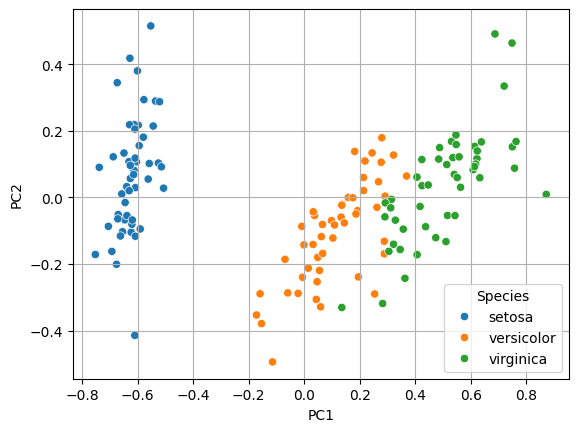

In [18]:
sns.scatterplot(x = 'PC1', y = 'PC2', data = x2_pc, hue = y)
plt.grid()
plt.show()

## 4.고차원 데이터 차원축소

### (1) 데이터 준비

#### 1) 데이터 로딩

In [19]:
# breast_cancer 데이터 로딩
cancer=load_breast_cancer()
x = cancer.data
y = cancer.target

x = pd.DataFrame(x, columns=cancer.feature_names)

x.shape

(569, 30)

In [20]:
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [21]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [22]:
x.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


#### 2) 스케일링
* 거리계산 기반 차원축소이므로 스케일링 필요

In [23]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

# (옵션)데이터프레임 변환
x = pd.DataFrame(x, columns=cancer.feature_names)

#### 3) 데이터 분할

* train, validation 분할

In [24]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = .3, random_state = 20)

### (2) 주성분 만들기

In [25]:
from sklearn.decomposition import PCA

In [26]:
# feature 수
x_train.shape[1]

30

* 주 성분 분석 수행

In [27]:
# 주성분을 몇개로 할지 결정(최대값 : 전체 feature 수)
n = x_train.shape[1]

# 주성분 분석 선언
pca = PCA(n_components=n)

# 만들고, 적용하기
x_train_pc = pca.fit_transform(x_train)
x_val_pc = pca.transform(x_val)

* 편리하게 사용하기 위해 데이터프레임으로 변환

In [28]:
# 칼럼이름 생성
column_names = [ 'PC'+str(i+1) for i in range(n) ]
column_names

['PC1',
 'PC2',
 'PC3',
 'PC4',
 'PC5',
 'PC6',
 'PC7',
 'PC8',
 'PC9',
 'PC10',
 'PC11',
 'PC12',
 'PC13',
 'PC14',
 'PC15',
 'PC16',
 'PC17',
 'PC18',
 'PC19',
 'PC20',
 'PC21',
 'PC22',
 'PC23',
 'PC24',
 'PC25',
 'PC26',
 'PC27',
 'PC28',
 'PC29',
 'PC30']

In [29]:
# 데이터프레임으로 변환하기
x_train_pc = pd.DataFrame(x_train_pc, columns = column_names)
x_val_pc = pd.DataFrame(x_val_pc, columns = column_names)
x_train_pc

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
0,0.215422,0.112002,-0.208768,-0.293000,-0.032626,-0.135166,-0.022526,-0.032558,0.047827,0.000123,...,-0.007350,-0.017951,0.000020,0.012561,0.031249,0.012504,-0.006305,-0.001172,-0.003217,-0.000551
1,0.869455,0.174561,-0.277555,-0.177606,0.142633,-0.032379,0.224845,0.131471,0.013562,-0.096306,...,-0.025857,0.048748,-0.020773,0.025104,0.016937,0.002102,-0.002214,0.018053,-0.000338,0.003576
2,-0.298314,0.259637,0.090626,0.118568,-0.017034,0.139689,-0.001580,0.037095,-0.016287,-0.022811,...,-0.006720,0.010245,-0.004547,-0.001281,0.000354,-0.006817,0.026928,0.002939,0.000047,0.001251
3,0.862285,0.165837,0.061614,0.199085,0.347577,-0.180729,0.228333,-0.067238,-0.069730,-0.117260,...,0.009059,-0.030910,-0.035322,0.034549,-0.005578,-0.043975,0.007471,-0.015473,0.000706,0.005161
4,-0.229030,0.149323,-0.483832,0.331190,-0.096083,-0.016467,-0.082057,0.026775,0.036597,0.092378,...,0.025143,-0.003776,-0.006688,-0.003650,-0.001208,0.003156,-0.004520,-0.002689,-0.002969,-0.000483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,0.741352,-0.388231,0.040183,0.074092,-0.068445,0.075507,0.024218,0.060493,-0.133940,-0.101752,...,-0.002090,-0.000484,-0.014230,-0.002124,-0.014765,0.006670,-0.007923,-0.001255,-0.003604,-0.000919
394,0.336910,0.050769,-0.187677,-0.248374,-0.064661,0.098182,0.056833,0.054760,0.031554,-0.014357,...,-0.027861,0.022020,0.005405,0.029800,0.020979,0.004420,-0.005289,0.011093,-0.009150,0.001309
395,-0.467700,0.063227,0.217000,-0.247931,-0.060940,-0.031664,-0.024826,-0.024798,-0.032136,-0.003169,...,0.006566,0.004962,-0.016222,-0.007670,-0.002116,-0.000877,-0.000649,0.000592,-0.000092,-0.000031
396,-0.320752,0.297598,0.063923,-0.290258,0.132390,-0.028911,0.168774,-0.034643,-0.047127,-0.012575,...,-0.015170,0.017832,0.002366,-0.012286,0.006574,0.004665,0.001124,-0.001223,-0.000861,0.000485


<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_01.png' width=120 align="left"/>

* 문1) 다음의 조건으로 주성분을 추출해 봅시다.
    * 주성분 1개로 선언하고, x_train을 이용해서 주성분 추출
    * 주성분 2개로 선언하고, x_train을 이용해서 주성분 추출
    * 주성분 3개로 선언하고, x_train을 이용해서 주성분 추출

In [30]:
# 주성분 1개짜리
pca1 = PCA(n_components=1)
x_pc1 = pca1.fit_transform(x_train)

In [31]:
# 주성분 2개짜리
pca2 = PCA(n_components=2)
x_pc2= pca2.fit_transform(x_train)

In [32]:
# 주성분 3개짜리
pca3 = PCA(n_components=3)
x_pc3= pca3.fit_transform(x_train)

* 문2) 각 주성분 결과에서 상위 3개 행씩 조회하여 비교해 봅시다.

In [33]:
print(x_pc1[:3])
print('-'*50)
print(x_pc2[:3])
print('-'*50)
print(x_pc3[:3])

[[ 0.21542202]
 [ 0.86945519]
 [-0.29831397]]
--------------------------------------------------
[[ 0.21542202  0.11200241]
 [ 0.86945519  0.1745606 ]
 [-0.29831397  0.25963695]]
--------------------------------------------------
[[ 0.21542202  0.11200241 -0.20876766]
 [ 0.86945519  0.1745606  -0.27755476]
 [-0.29831397  0.25963695  0.09062589]]


### (3) 주성분 누적 분산 그래프
* 그래프를 보고 적절한 주성분의 개수를 지정(elbow method!)
* x축 : PC 수
* y축 : 전체 분산크기 - 누적 분산크기

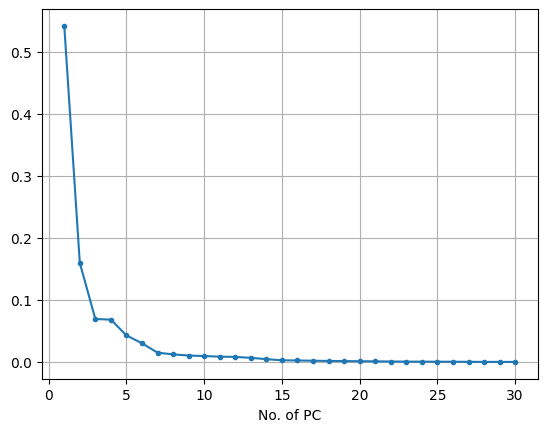

In [34]:
plt.plot(range(1,n+1), pca.explained_variance_ratio_, marker = '.')
plt.xlabel('No. of PC')
plt.grid()
plt.show()

주성분 개수 몇개면 충분할까요?

### (4) 시각화
* 주 성분 중 상위 2개를 뽑아 시각화 해 봅시다.

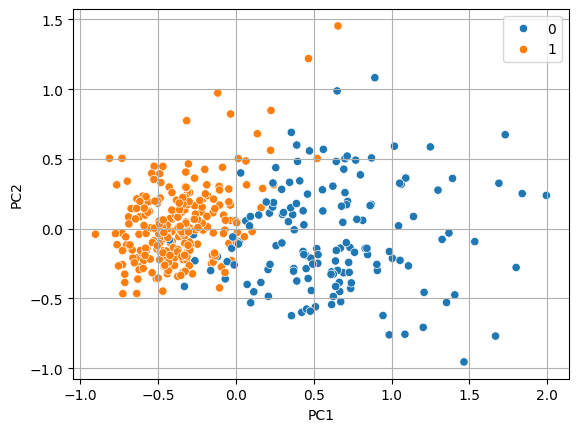

In [35]:
sns.scatterplot(x = 'PC1', y = 'PC2', data = x_train_pc, hue = y_train)
plt.grid()
plt.show()

## 5.지도학습으로 연계하기

### (1) 원본데이터로 모델 생성하기
* knn 알고리즘으로 분류 모델링을 수행합니다.
* k : 기본값으로 지정

* 학습

In [36]:
model0 = KNeighborsClassifier()
model0.fit(x_train, y_train)

KNeighborsClassifier()

* 예측 및 평가

In [37]:
# 원본데이터 모델의 성능
pred0 = model0.predict(x_val)

print(confusion_matrix(y_val, pred0))
print(accuracy_score(y_val, pred0))
print(classification_report(y_val, pred0))

[[ 62   2]
 [  3 104]]
0.9707602339181286
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        64
           1       0.98      0.97      0.98       107

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



### (2) 실습
* 다음의 조건으로 모델을 만들고 성능을 확인해 봅시다.
    * 알고리즘 : KNN

#### 1) 주성분 상위 1개로 모델 만들기

In [38]:
column_names

['PC1',
 'PC2',
 'PC3',
 'PC4',
 'PC5',
 'PC6',
 'PC7',
 'PC8',
 'PC9',
 'PC10',
 'PC11',
 'PC12',
 'PC13',
 'PC14',
 'PC15',
 'PC16',
 'PC17',
 'PC18',
 'PC19',
 'PC20',
 'PC21',
 'PC22',
 'PC23',
 'PC24',
 'PC25',
 'PC26',
 'PC27',
 'PC28',
 'PC29',
 'PC30']

In [39]:
column_names[:1]

['PC1']

In [40]:
cols = column_names[:1]
x_train_pc1 = x_train_pc.loc[:, cols]
x_val_pc1 = x_val_pc.loc[:, cols]

In [41]:
x_train_pc1.shape

(398, 1)

* 주성분 1개로 만든 모델 Vs. 전체 변수로 만든 모델

In [42]:
# KNN 모델링, 주성분 1개로 모델링
model1 = KNeighborsClassifier()
model1.fit(x_train_pc1, y_train)

KNeighborsClassifier()

In [43]:
# 원본데이터 모델의 성능
pred1 = model1.predict(x_val_pc1)

print(confusion_matrix(y_val, pred1))
print(accuracy_score(y_val, pred1))
print(classification_report(y_val, pred1))

[[58  6]
 [10 97]]
0.9064327485380117
              precision    recall  f1-score   support

           0       0.85      0.91      0.88        64
           1       0.94      0.91      0.92       107

    accuracy                           0.91       171
   macro avg       0.90      0.91      0.90       171
weighted avg       0.91      0.91      0.91       171



#### 2) 주성분 2개로 모델링

In [44]:
n = 2
# 데이터 준비
cols = column_names[:n]
x_train_pc_n = x_train_pc.loc[:, cols]
x_val_pc_n = x_val_pc.loc[:, cols]

# 모델링
model_n = KNeighborsClassifier()
model_n.fit(x_train_pc_n, y_train)

KNeighborsClassifier()

In [45]:
# 예측
pred_n = model_n.predict(x_val_pc_n)

# 평가
print(confusion_matrix(y_val, pred_n))
print(accuracy_score(y_val, pred_n))
print(classification_report(y_val, pred_n))

[[ 63   1]
 [  5 102]]
0.9649122807017544
              precision    recall  f1-score   support

           0       0.93      0.98      0.95        64
           1       0.99      0.95      0.97       107

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171



## 6.[추가]t-SNE

### (1) 학습(차원축소)

In [46]:
from sklearn.manifold import TSNE

In [47]:
# 2차원으로 축소하기
tsne = TSNE(n_components = 2, random_state=20)
x_tsne = tsne.fit_transform(x)

# 사용의 편리함을 위해 DataFrame으로 변환
x_tsne = pd.DataFrame(x_tsne, columns = ['T1','T2'])

In [48]:
x_tsne.shape

(569, 2)

### (2) 시각화

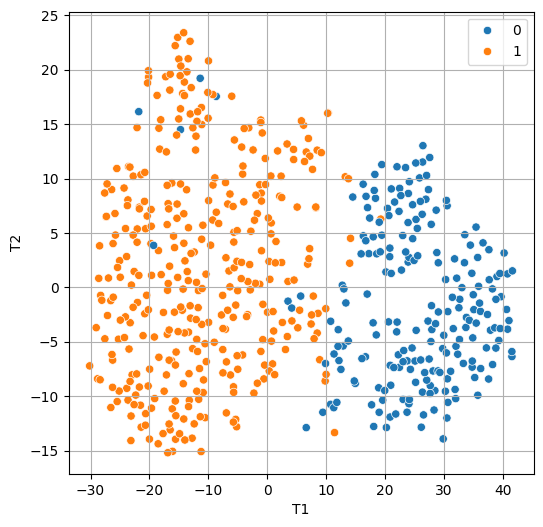

In [49]:
plt.figure(figsize=(6,6))
sns.scatterplot(x = 'T1', y = 'T2', data = x_tsne, hue = y)
plt.grid()

### (3) 실습

#### 1) 데이터 준비

* 샘플데이터 로딩

In [50]:
digits = load_digits()
x = digits.data
y = digits.target

y = pd.Categorical(y)

In [51]:
x.shape

(1797, 64)

* 둘러보기

In [52]:
print(x[0].reshape(8,8))

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


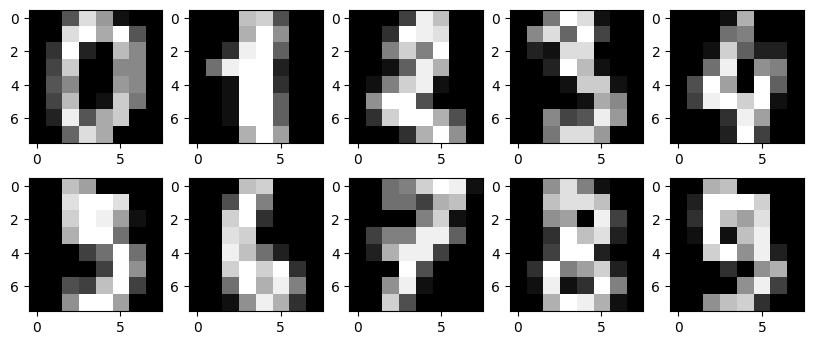

In [53]:
# f, axes = plt.subplots(5, 2, sharey=True, figsize=(16,6))
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x[i,:].reshape([8,8]), cmap='gray');

* 스케일링

In [54]:
# 최대, 최소값
np.min(x), np.max(x)

(0.0, 16.0)

In [55]:
# 최대값으로 나누면 Min Max 스케일링이 됩니다.
x = x / 16

#### 2) PCA
* 주성분 2개로 차원을 축소하고
* 시각화 합니다.

In [56]:
# 차원 축소
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)

# 데이터프레임으로 변환(옵션)
x_pca = pd.DataFrame(x_pca, columns = ['PC1', 'PC2'])

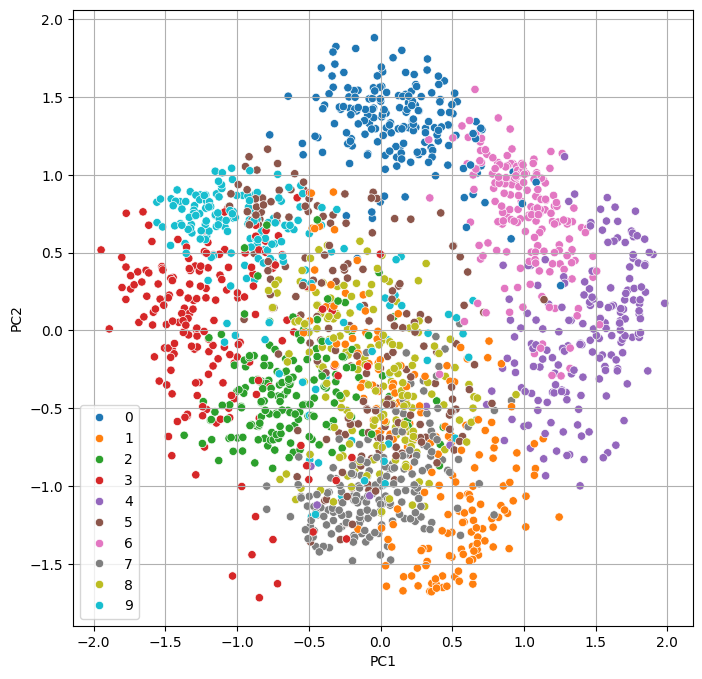

In [57]:
# 시각화
plt.figure(figsize=(8, 8))
sns.scatterplot(x = 'PC1', y = 'PC2', data = x_pca, hue = y)
plt.grid()
plt.show()

#### 3) tSNE
* 2차원으로 축소하고
* 시각화 합니다.

In [58]:
tsne = TSNE(n_components = 2, random_state=20)
x_tsne = tsne.fit_transform(x)

# 데이터프레임으로 변환(옵션)
x_tsne = pd.DataFrame(x_tsne, columns = ['T1', 'T2'])

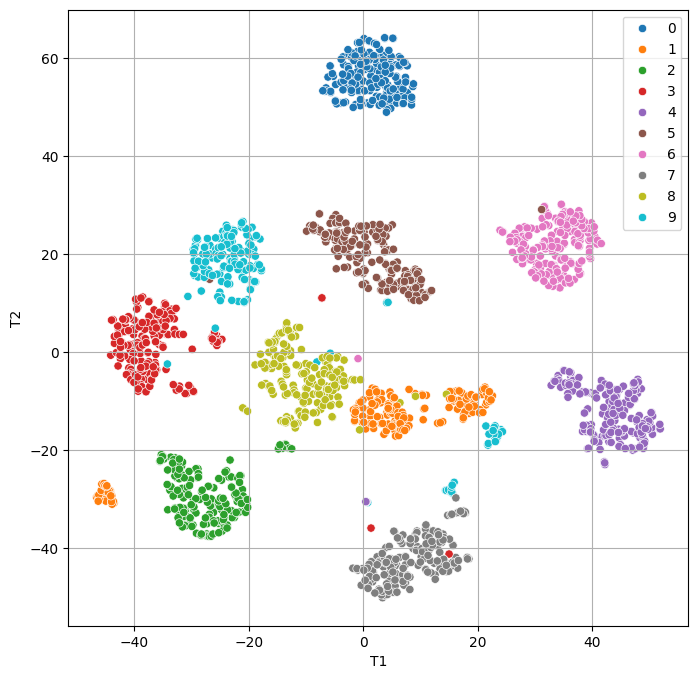

In [59]:
# 시각화
plt.figure(figsize=(8, 8))
sns.scatterplot(x = 'T1', y = 'T2', data = x_tsne, hue = y)
plt.grid()
plt.show()